KFolds with XGB

In [27]:
import xgboost
from xgboost import XGBRegressor, XGBClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import MEstimateEncoder, TargetEncoder
from sklearn.inspection import permutation_importance

import seaborn as sns
import shap

from tqdm import tqdm


from utils import get_na_cols, process_train, process, params2, categorical_cols, one_hot_cols, target_encoding_cols, ordinal_cols, useless_cols, numeric_cols

In [28]:
def cal_mean_errors(train_df, models):
    cv = KFold(n_splits=5, shuffle=True)
    rmsles = []
    most_important_features = []
    train_df = train_df.drop(train_df[train_df['build_year'] > 2018].id)
    train_df.reset_index(drop=True, inplace=True)
    
    for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(train_df))):
        rmsles_ = []
        most_important_features_ = []
        for model in models:
            X_train = train_df.iloc[train_idx]
            processed_df, oe, te = process_train(X_train)
            X_train = processed_df.drop(['price_doc'], axis=1)
            y_train = processed_df['price_doc']
            
            X_test = train_df.iloc[test_idx]
            y_test = X_test['price_doc']
            X_test = X_test.drop(['price_doc'], axis=1)
            X_test = process(X_test, te, oe)

            
            evaluation = [( X_test, y_test)]
            model.fit(X_train, y_train, eval_set=evaluation, verbose=False)
            pred = model.predict(X_test)
            rmsles_.append(mean_squared_log_error(y_test, pred, squared=False))
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)

            # Average across samples            
            most_important_features_.append(np.abs(shap_values).mean(axis=0))
    
        rmsles.append(rmsles_)
        most_important_features.append(most_important_features_)

    # Average across folds
    average_feature_importance = np.array(most_important_features).mean(axis=0)
    important_features = []

    for average_val in average_feature_importance:
        feature_names = X_test.columns
        shap_importance = pd.DataFrame(list(zip(feature_names, average_val)),
                                        columns=['col_name','feature_importance_vals'])
        shap_importance.sort_values(by=['feature_importance_vals'],
                                    ascending=False, inplace=True)
        
        important_features.append(shap_importance)  


    return rmsles, important_features


In [29]:
# Import train data
train_df = pd.read_csv('../Dataset/train.csv/train.csv')
model1 =  XGBRegressor(
                    # verbosity=0,
                    n_estimators=params2['n_estimators'],
                    device=params2['device'],
                    objective=params2['objective'],
                    eval_metric=params2['eval_metric'],
                    enable_categorical=params2['enable_categorical'],
                    early_stopping_rounds=params2['early_stopping_rounds'],

                    eta=params2['eta'],
                    max_depth = params2['max_depth'],
                    # gamma = params2['gamma'],
                    # reg_alpha = params2['reg_alpha'],
                    # min_child_weight=params2['min_child_weight'],
                    colsample_bytree=params2['colsample_bytree']     
                )

models = [model1]

rmsles, most_important_features = cal_mean_errors(train_df, models)

0it [00:00, ?it/s]is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


price_doc not found


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

price_doc not found


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

price_doc not found


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

price_doc not found


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

price_doc not found


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

In [30]:
rmsles = np.array(rmsles)
print(rmsles)

[[0.46544343]
 [0.46704824]
 [0.47100742]
 [0.46988601]
 [0.50601164]]


In [43]:
most_important_features[0]



,col_name,feature_importance_vals
0,full_sq,1.662107e+06
284,sub_area_te,7.731341e+05
8,state,3.945017e+05
280,year,2.900006e+05
6,num_room,2.807536e+05
...,...,...
61,0_13_all,9.568761e+01
184,mosque_count_1000,7.606581e+01
99,water_1line,2.638235e+01
30,incineration_raion,7.601418e+00


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='feature_importance_vals', ylabel='col_name'>

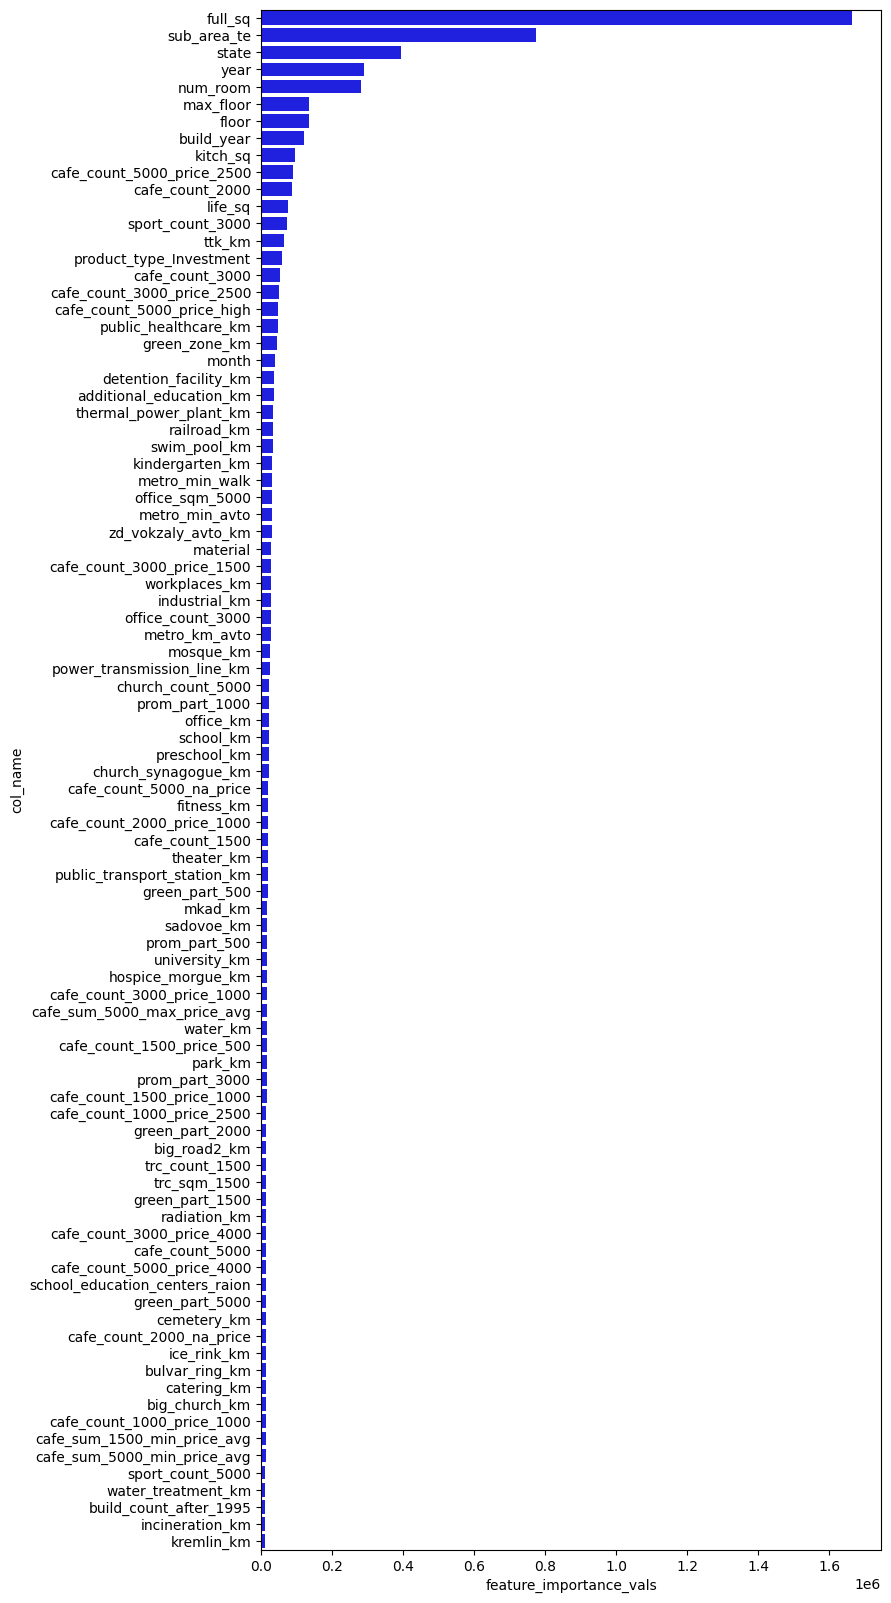

In [49]:
limit = 90
plt.figure(figsize=(8, 20))
sns.barplot(x="feature_importance_vals", y="col_name", data=most_important_features[0].iloc[:limit],
           color="b")